# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Explore The DataSet

In [17]:
df = pd.read_csv("dataSets/segmentation data.csv",index_col = 0)

In [18]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [19]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

We can also apply the describe method to see descriptive statistics about the columns.

In [20]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


df.info() method returns information about the DataFrame including the index data type and columns, non-null values, and memory usage.

We see that there is no missing value in the dataset and all the variables are integer.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


- A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.
- We calculate the correlation between our variables using corr method in the pandas library.

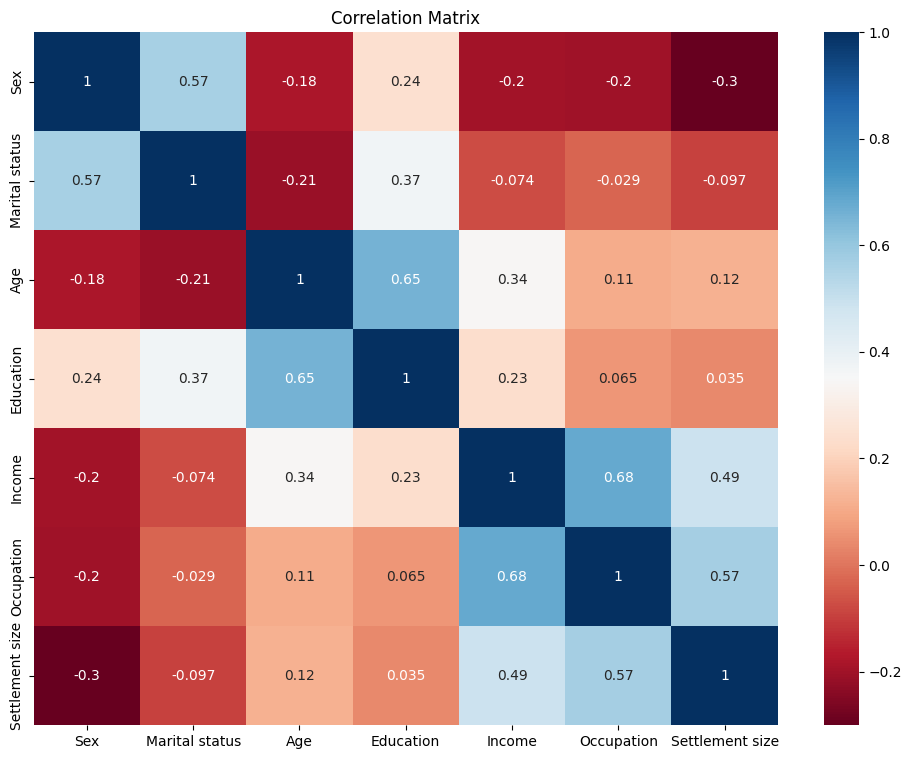

In [27]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.title("Correlation Matrix")
plt.show()

Let’s explore the correlation.

- We see that there is a strong correlation between Education and Age. In other words, older people tend to be more highly educated.

How about income and occupation?

- Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.

- Correlation matrix is a very useful tool to analyze the relationship between features.

Now, we understand our dataset and have a general idea of it.

Next section will be the segmentation. But before that, we need to scale our data first.

# Data Preprocessing

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.

In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].

This process is commonly referred to as Standardization.

In [35]:
scaler = StandardScaler()

In [36]:
df_std = scaler.fit_transform(df)

In [40]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)

In [41]:
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


# Building Our Segmentation Model

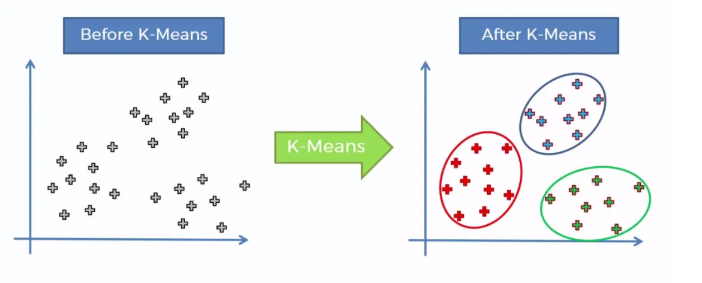

Before applying the K-Means algorithm we need to choose how many clusters we would like to have.

But How?

There are two components. Within Clusters Sum of Squares(WCSS) and Elbow Method.

In [55]:
WCSS = []

k= range(1,11)

for i in k:
    
    model = KMeans(n_clusters=i, init="k-means++",random_state = 42)
    model.fit(df_std)
    WCSS.append(model.inertia_)

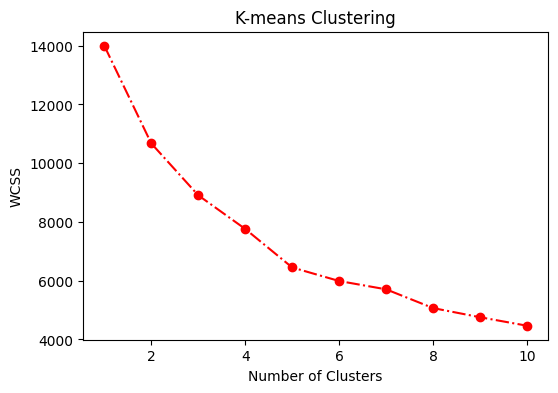

In [56]:
plt.figure(figsize=(6,4))
plt.plot(k,WCSS, color="r", marker="o",linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.

In [57]:
model1 = KMeans(n_clusters=4, init="k-means++",random_state = 42)
model2 = KMeans(n_clusters=5, init="k-means++",random_state = 42)

In [58]:
model1.fit(df_std)
model2.fit(df_std)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


#### We create a new data frame with the original features and add a new column with the assigned clusters for each point.

In [68]:
df_segm_kmeans1= df_std.copy()
df_segm_kmeans2= df_std.copy()

In [69]:
df_segm_kmeans1["Segment K-means"] = model1.labels_
df_segm_kmeans2["Segment K-means"] = model2.labels_

In [71]:
df_segm_kmeans1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [72]:
df_segm_kmeans2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,4
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3
